In [1]:
import os
os.system('clear')

import numpy as np
import pandas as pd

from termcolor import colored
from SecretColors.palette import Palette
material = Palette("material", color_mode = 'hexa')

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'SF Compact Text'
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['axes.titleweight'] = 'semibold'
mpl.rcParams['axes.labelweight'] = 'medium'

# os.chdir("./Elbas volumes")


...

Year: 2013

Buy volume: 467398 MWh
Sell volume: 402690 MWh



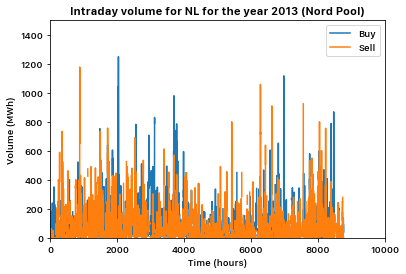

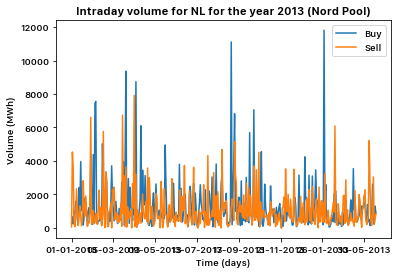


...

Year: 2014

Buy volume: 700981 MWh
Sell volume: 612847 MWh



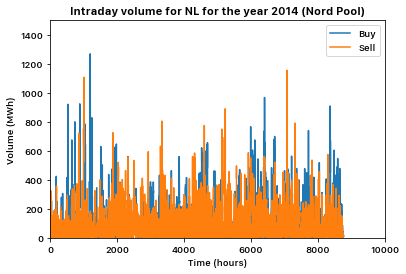

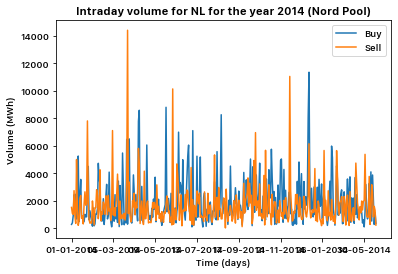


...

Year: 2015

Buy volume: 549584 MWh
Sell volume: 374836 MWh



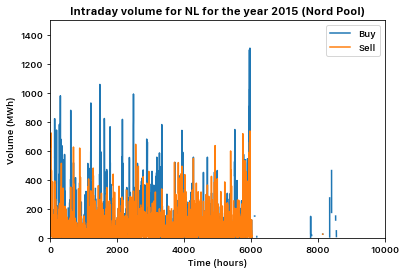

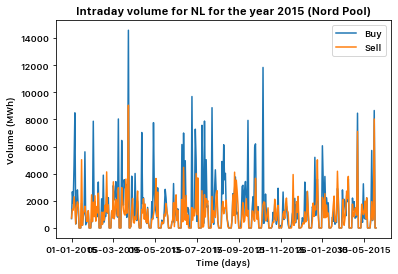


...

Year: 2016

Buy volume: 173636 MWh
Sell volume: 60217 MWh



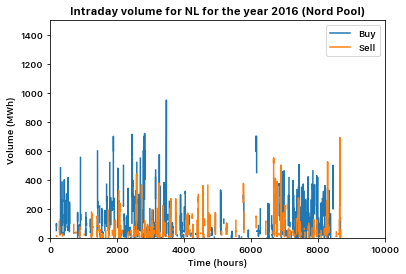

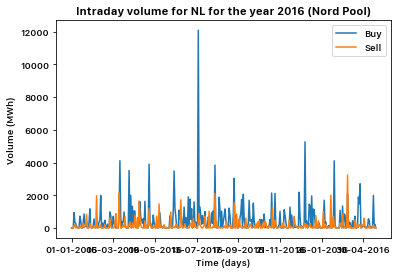


...

Year: 2017

Buy volume: 145704 MWh
Sell volume: 80052 MWh



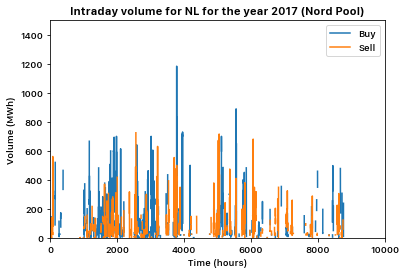

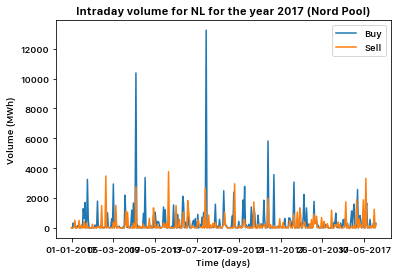


...

Year: 2018

Buy volume: 3175 MWh
Sell volume: 2854 MWh



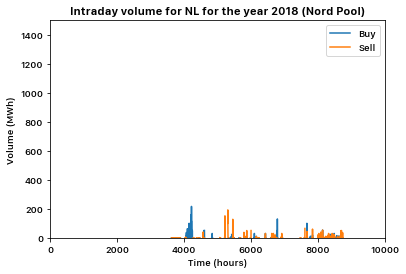

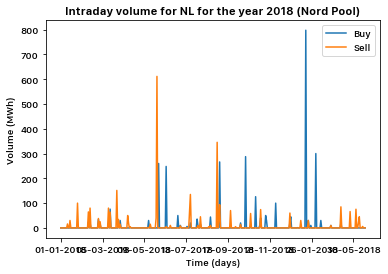


...

Year: 2019

Buy volume: 82857 MWh
Sell volume: 72470 MWh



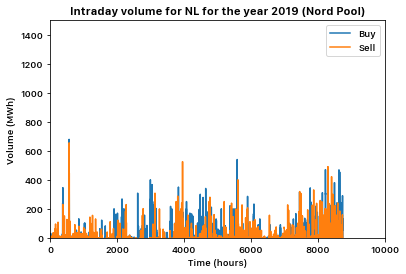

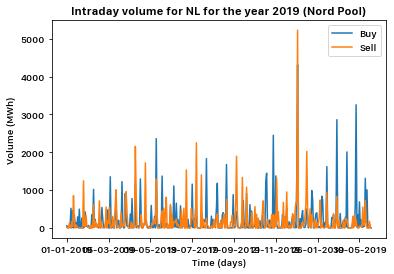


...

Year: 2020

Buy volume: 280746 MWh
Sell volume: 268330 MWh



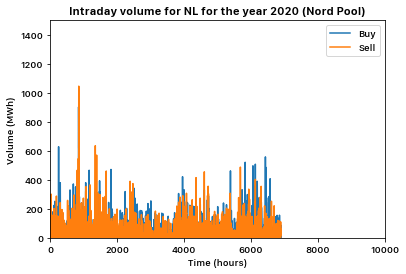

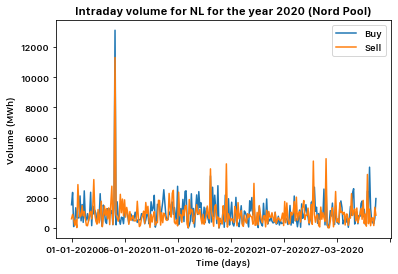


...

Period: 2013–2020
Buy volume: 2404081 MWh
Sell volume: 1874295 MWh

...



In [2]:
years = ['2013','2014','2015','2016','2017','2018','2019','2020']
# years = ['2019']
country = 'NL'
dfo = pd.DataFrame()

buy = []
sell = []
breaks = []

for y in years:
    i = years.index(y)
    df = pd.read_html(f"./elbas-volumes_{y}_hourly.xls", header=[2,3], decimal=',', thousands='.')
    df = df[0]
    df2 = df[(country)]
    df2 = df2.apply(pd.to_numeric, args=('coerce',))
    df2['Date'] = df.iloc[:, [0]]
    df2['Time'] = df.iloc[:, [1]]
    df = df2

    df_group = df.groupby(['Date']).sum()
    
    buy.append(df['Buy'].sum())
    sell.append(df['Sell'].sum())
    
    print('')
    print(colored('...','white'))
    print('')
    print(colored(f'Year: {y}', 'blue'))
    print('')
    print(colored(f'Buy volume: {int(round(buy[i]))} MWh', 'blue'))
    print(colored(f'Sell volume: {int(round(sell[i]))} MWh', 'blue'))
    print('')
    
    df.plot(legend=True)
    plt.title(f'Intraday volume for {country} for the year {y} (Nord Pool)')
    plt.xlim(0,10000)
    plt.ylim(0, 1500)
    plt.xlabel(r'Time (hours)')
    plt.ylabel(r'Volume (MWh)')
    plt.show()

    df_group.plot(legend=True)
    plt.title(f'Intraday volume for {country} for the year {y} (Nord Pool)')
    # plt.xlim(0,50)
    # plt.ylim(0, 1500)
    plt.xlabel(r'Time (days)')
    plt.ylabel(r'Volume (MWh)')
    plt.show()

    dfo = dfo.append(df, ignore_index = True)
    breaks.append(len(dfo))

print('')
print(colored('...','white'))
print('')
print(colored(f'Period: {years[0]}–{years[-1]}', 'blue'))
print(colored(f'Buy volume: {int(round(sum(buy)))} MWh', 'blue'))
print(colored(f'Sell volume: {int(round(sum(sell)))} MWh', 'blue'))
print('')
print(colored('...','white'))
print('')

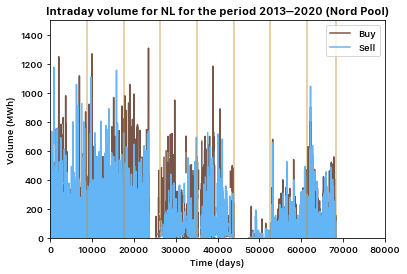

In [3]:
color_dict = {'Buy': material.brown(shade=50, alpha=1), 'Sell': material.blue(shade=30, alpha=1)}
dfo.plot(color=[color_dict.get(x, '#333333') for x in df.columns])
plt.title(f'Intraday volume for {country} for the period {years[0]}–{years[-1]} (Nord Pool)')
plt.xlim(0,80000)
plt.ylim(0, 1500)
plt.xlabel(r'Time (days)')
plt.ylabel(r'Volume (MWh)')
[plt.axvline(_breaks, color = material.gold(shade=50, alpha=0.5)) for _breaks in breaks]
plt.show()